# Hadamard Operator

## Task 1

### Experiment 1

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

In [2]:
qreg1 = QuantumRegister(1, 'qreg1')
creg1 = ClassicalRegister(1, 'creg1')

In [3]:
qc1 = QuantumCircuit(qreg1,creg1)

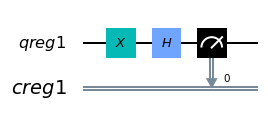

In [4]:
qc1.x(qreg1[0])
qc1.h(qreg1[0])
qc1.measure(qreg1,creg1)
qc1.draw('mpl')

In [5]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc1, backend, shots=10000)
counts1 = job.result().get_counts(qc1)
print(counts1)

{'0': 5080, '1': 4920}


### Experiment 2

In [6]:
qreg2 = QuantumRegister(1, 'qreg2')
creg2 = ClassicalRegister(1, 'creg2')

In [7]:
qc2 = QuantumCircuit(qreg2,creg2)

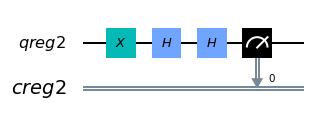

In [8]:
qc2.x(qreg2[0])
qc2.h(qreg2[0])
qc2.h(qreg2[0])
qc2.measure(qreg2,creg2)
qc2.draw('mpl')

In [9]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc2, backend, shots=10000)
counts2 = job.result().get_counts(qc2)
print(counts2)

{'1': 10000}


### Comparing Experiment 1 with Experiment 2

In [10]:
from qiskit.visualization import plot_histogram

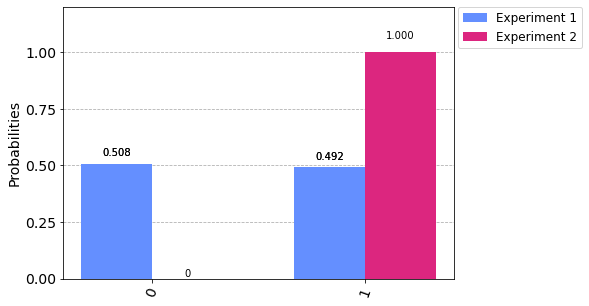

In [11]:
legend = ['Experiment 1', 'Experiment 2']
plot_histogram([counts1, counts2], legend=legend)

# One Qubit


## Task 1

For the system:
$$
|\psi \rangle = 
\begin{pmatrix}
-\frac{3}{5} \\ 
- \frac{4}{5}\end{pmatrix}
$$

* The probablity of observing the state $|0\rangle$ is $\frac{9}{25}$
* The probablity of observing the state $|1\rangle$ is $\frac{16}{25}$

For the system:
$$
|\psi \rangle = 
\begin{pmatrix}
\frac{3}{5} \\ 
- \frac{4}{5}\end{pmatrix}
$$

* The probablity of observing the state $|0\rangle$ is $\frac{9}{25}$
* The probablity of observing the state $|1\rangle$ is $\frac{16}{25}$

For the system:
$$
|\psi \rangle = 
\begin{pmatrix}
\frac{1}{\sqrt{3}} \\ 
- \frac{\sqrt{2}}{\sqrt{3}}\end{pmatrix}
$$

* The probablity of observing the state $|0\rangle$ is $\frac{1}{3}$
* The probablity of observing the state $|1\rangle$ is $\frac{2}{3}$

# Quantum State

## Task 1

### vector $|v\rangle$

In [12]:
v_amps = [-0.1, -0.3, 0.4, 0.5]
squares_sum = 0

In [13]:
for i in range(len(v_amps)):
    squares_sum += v_amps[i]**2

In [14]:
import numpy as np 
a_squared = 1 - squares_sum 
a = np.sqrt(a_squared)

In [15]:
print('The value of a can be either', a, 'or', -a)

The value of a can be either 0.7 or -0.7


### vector $|u\rangle$

In [16]:
u_amps = [1/np.sqrt(2), -1/np.sqrt(3)]
squares_sum = 0

In [17]:
for i in range(len(u_amps)):
    squares_sum += u_amps[i]**2

In [18]:
one_over_b = 1 - squares_sum
b = 1/one_over_b

In [19]:
print('The value of b mus equal to', b)

The value of b mus equal to 5.999999999999997


## Task 2

In [20]:
from random import randrange

In [21]:
def random_quantum_state():
    amp1 = randrange(-100,101)
    amp2 = randrange(-100,101)
    len_sq = amp1**2 + amp2**2
    while len_sq == 0:
        amp1 = randrange(-100,101)
        amp2 = randrange(-100,101)
        len_sq = amp1**2 + amp2**2 
    
    amp1 = amp1 / np.sqrt(len_sq)
    amp2 = amp2 / np.sqrt(len_sq)
    
    return [amp1, amp2]

In [22]:
def valid_quantum_state_test(quantum_state):
    squares_sum = 0
    
    for i in range(len(quantum_state)):
        squares_sum += quantum_state[i]**2
                       
    if (squares_sum - 1)**2 < 0.00000001:
        return True
    else: 
        return False

In [23]:
def hadamard_operator(quantum_state):
    output_state = [0,0]
    output_state[0] = (1/np.sqrt(2)) * quantum_state[0] + (1/np.sqrt(2)) * quantum_state[1]
    output_state[1] = (1/np.sqrt(2)) * quantum_state[0] - (1/np.sqrt(2)) * quantum_state[1]
    return output_state

In [24]:
for i in range(10):
    initial_state = random_quantum_state()
    print('Initial quantum state:', initial_state)
    initial_validity_test = valid_quantum_state_test(initial_state)
    print('Is that state valid?', initial_validity_test)
    final_state = hadamard_operator(initial_state)
    print('Final quantum state:', final_state)
    final_validity_test = valid_quantum_state_test(final_state)
    print('Is that state valid?', final_validity_test)
    print('--------------------------------------------------------------------')

Initial quantum state: [-0.778753909083283, -0.6273295378726446]
Is that state valid? True
Final quantum state: [-0.9942511402566916, -0.1070731997199515]
Is that state valid? True
--------------------------------------------------------------------
Initial quantum state: [0.239968270756075, -0.9707807316950307]
Is that state valid? True
Final quantum state: [-0.5167624469055644, 0.8561288299480246]
Is that state valid? True
--------------------------------------------------------------------
Initial quantum state: [0.9873644507943469, 0.15846589951020382]
Is that state valid? True
Final quantum state: [0.810224410789705, 0.5861197865287227]
Is that state valid? True
--------------------------------------------------------------------
Initial quantum state: [-0.9915095306014198, -0.13003403680018621]
Is that state valid? True
Final quantum state: [-0.7930510619058273, -0.6091551634928818]
Is that state valid? True
--------------------------------------------------------------------
Ini

# Visualization of a (Real-Valued) Qubit

## Task 1

In [25]:
import matplotlib.pyplot as plt
%run qlatvia.py

ModuleNotFoundError: No module named 'quantum'

In [26]:
colors = ['ro','bo','go','yo','co','mo','ko']

In [27]:
def quantum_state_point_drawer(state_num):
    plt.figure(figsize=(6,6), dpi=60)
    plt.plot(0,0,colors[0])
    draw_axes()
    
    for i in range(state_num):
        quantum_state = random_quantum_state()
        x = quantum_state[0]
        y = quantum_state[1]
        plt.plot(x,y, colors[randrange(len(colors))])
    
plt.show()

### Drawing 100 random quantum state point

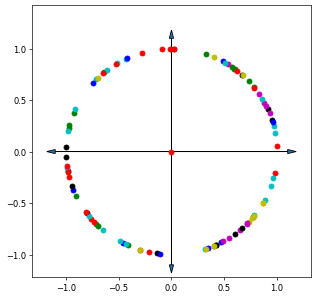

In [28]:
quantum_state_point_drawer(100)

### Drawing 1000 random quantum state point

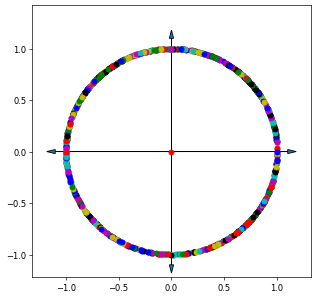

In [29]:
quantum_state_point_drawer(1000)

## Task 2

In [30]:
colors = ['r','b','g','y','b','c','m']

In [31]:
def quantum_state_arrow_drawer(state_num):
    plt.figure(figsize=(6,6), dpi=60)
    draw_axes()
    plt.plot(0,0, color=colors[0])
    
    for i in range(state_num):
        quantum_state = random_quantum_state()
        x = quantum_state[0]
        y = quantum_state[1]
        x = 0.92 * x
        y = 0.92 * y
        plt.arrow(0,0,x,y,head_width=0.04, head_length=0.08, color = colors[randrange(len(colors))])
        
    plt.show()

### Drawing 100 random quantum state arrow

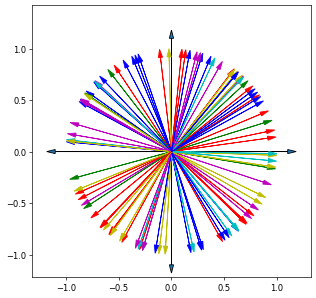

In [32]:
quantum_state_arrow_drawer(100)

### Drawing 1000 random quantum state arrow

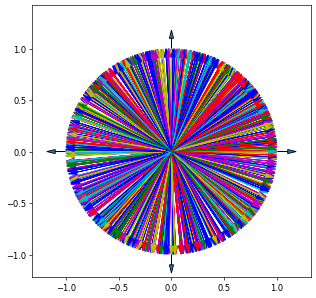

In [33]:
quantum_state_arrow_drawer(1000)

## Task 3 

In [34]:
import numpy as np

In [35]:
def random_polar_quantum_state():
    angle_deg = randrange(360)
    angle_rad = 2*np.pi*angle_deg/360
    state = [np.cos(angle_rad), np.sin(angle_rad)]
    return state

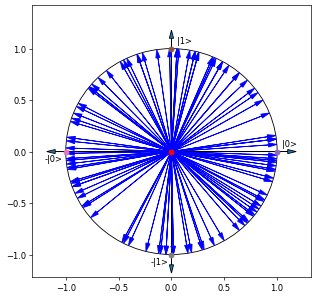

In [36]:
draw_qubit()
for i in range(100):
    x, y = random_polar_quantum_state()
    draw_quantum_state(x, y, '')

# Superposition

## Task 3 

In [37]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

In [38]:
qreg = QuantumRegister(1, 'qreg')
creg = ClassicalRegister(1, 'creg')

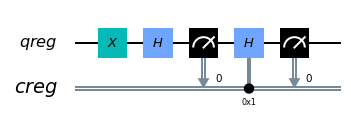

In [39]:
qc = QuantumCircuit(qreg, creg)
qc.x(qreg[0])
qc.h(qreg[0])
qc.measure(qreg, creg)
qc.h(0).c_if(creg, 1)
qc.measure(qreg, creg)
qc.draw('mpl')

In [40]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
counts = job.result().get_counts(qc)
print(counts)

{'0': 753, '1': 247}


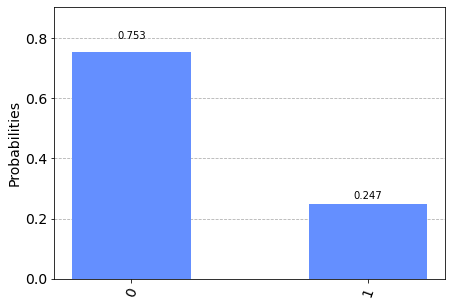

In [41]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Task 4 

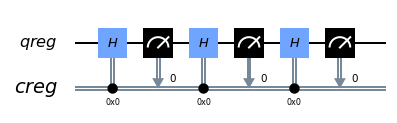

In [42]:
qc = QuantumCircuit(qreg, creg)
for i in range(3):
    qc.h(qreg[0]).c_if(creg, 0)
    qc.measure(qreg, creg)
    
qc.draw('mpl')

In [43]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
counts = job.result().get_counts(qc)
print(counts)

{'0': 126, '1': 874}


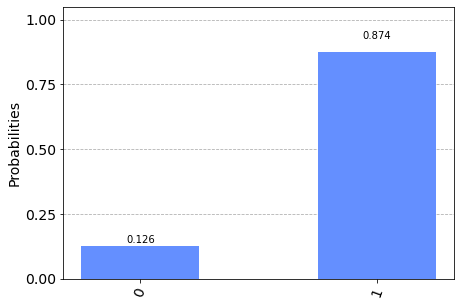

In [44]:
plot_histogram(counts)